In [1]:
import numpy as np
import json
import pandas as pd
from pandas.io.json import json_normalize
from statistics import mean
from mae import count_mae

from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

import sys
import os
import time

from preprocessing import cleansing
from preprocessing import plot_confusion_matrix

In [2]:
# Read the data
with open('../Data Set/sentimen_own_full_repaired.json','r',encoding='utf-8') as json_data:
    tweet = json.load(json_data)

# Convert to dataframe
df = pd.io.json.json_normalize(data=tweet, record_path=['RECORDS'])
# Convert to matrix
data = df.as_matrix()

In [3]:
# Initiation data train and target
X = np.array(data[:,4])
y = np.array(data[:,1])
kf = KFold(n_splits=10)

In [4]:
final_test_labels = []
final_prediction = []

precision_val = []
recall_val = []
fscore_val = []

In [5]:
for train_index, test_index in kf.split(X):
    
    X_trainSet, X_testSet = X[train_index], X[test_index]
    y_trainSet, y_testSet = y[train_index], y[test_index]
    
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []
    
    # Change label train
    for i in range(len(X_trainSet)):  
        train_data.append(cleansing(X_trainSet[i]))
        if int(y_trainSet[i]) == 2:
            train_labels.append(2)
        elif int(y_trainSet[i]) == 1:
            train_labels.append(1)
        elif int(y_trainSet[i]) == -2:
            train_labels.append(-2)
        elif int(y_trainSet[i]) == -1:
            train_labels.append(-1)
        elif int(y_trainSet[i]) == 0:
            train_labels.append(0)
            
    # Change label test    
    for i in range(len(X_testSet)):
        test_data.append(cleansing(X_testSet[i]))
        if int(y_testSet[i]) == 2:
            test_labels.append(2)
        elif int(y_testSet[i]) == 1:
            test_labels.append(1)
        elif int(y_testSet[i]) == -2:
            test_labels.append(-2)
        elif int(y_testSet[i]) == -1:
            test_labels.append(-1)
        elif int(y_testSet[i]) == 0:
            test_labels.append(0)
    
    # Convert data to vector
    vectorizer = TfidfVectorizer(min_df=5,
                             max_df = 0.8,
                             sublinear_tf=True,
                             use_idf=True)
    train_vectors = vectorizer.fit_transform(train_data)
    test_vectors = vectorizer.transform(test_data)
    
    # Start Train
    classifier = MultinomialNB().fit(train_vectors, train_labels)
    prediction = classifier.predict(test_vectors)
    
    precision, recall, fscore, Null_Value = precision_recall_fscore_support(test_labels, prediction, average='macro')
    print(precision_recall_fscore_support(test_labels, prediction, average='macro'))
    
    precision_val.append(precision)
    recall_val.append(recall)
    fscore_val.append(fscore)
    
    final_test_labels.extend(test_labels)
    final_prediction.extend(prediction)

C:\Users\podvertible19960504\Anaconda3\envs\analisis_sentimen\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.35893323996265175, 0.3834991391152467, 0.3681133599550036, None)
(0.3578112226119602, 0.393714269920578, 0.3661678659357259, None)
(0.3165891836784742, 0.3491542901115814, 0.2904661246612466, None)
(0.36991542312034975, 0.3472058873330903, 0.33673957886422334, None)
(0.35872172138775554, 0.35142202193900574, 0.3444977432600578, None)
(0.36704638928791994, 0.38469070619465145, 0.3719259208689979, None)
(0.37353460272094263, 0.36798065040360994, 0.3622632666067923, None)
(0.34935857963875205, 0.37026307026307026, 0.3503984859923548, None)
(0.33868970918660357, 0.35130603302999663, 0.34091319931432135, None)
(0.40410340014278257, 0.3342087085085498, 0.3507936507936508, None)


In [13]:
print("recall ", mean(recall_val))
print("presisi ", mean(precision_val))
print("akurasi ", accuracy_score(final_test_labels, final_prediction))
print("mae", count_mae(actual=final_test_labels, predicted=final_prediction))

recall  0.363344477681938
presisi  0.3594703471738192
akurasi  0.6268638015286305


TypeError: count_mae() missing 1 required positional argument: 'self'

Confusion matrix, without normalization
[[   0  148   42    9    0]
 [   0 1308  692  120    0]
 [   0  515 2859  209    0]
 [   0  335  684  836    0]
 [   0   15   50  159    0]]


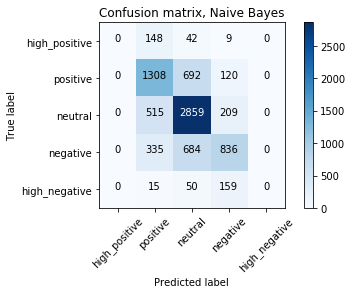

In [10]:
class_names = ['high_positive', 'positive', 'neutral', 'negative', 'high_negative']
cm = confusion_matrix(final_test_labels, final_prediction)
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, Naive Bayes')